<a href="https://colab.research.google.com/github/Mostafa-Hesham1/Graduation-project/blob/Mostafa-Hesham-220367/vmd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d cyizhuo/stanford-cars-by-classes-folder
!unzip stanford-cars-by-classes-folder.zip -d /content/cars_by_classes


Dataset URL: https://www.kaggle.com/datasets/cyizhuo/stanford-cars-by-classes-folder
License(s): unknown
 99% 1.81G/1.82G [00:30<00:00, 73.5MB/s]
100% 1.82G/1.82G [00:30<00:00, 64.5MB/s]


In [3]:
!ls /content/cars_by_classes


README.md  test  train


In [18]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the dataset
data_dir = '/content/cars_by_classes/train'


In [19]:
# List to store image paths and model names
image_data = []

# Loop through each class folder and collect image paths and model names
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    if os.path.isdir(class_dir):
        for img_file in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_file)
            image_data.append([img_path, class_name])

# Create a DataFrame from the collected data
df_images = pd.DataFrame(image_data, columns=['image_path', 'model_name'])

# Display the first few rows of the DataFrame
df_images.head()


,image_path,model_name
0,/content/cars_by_classes/train/Audi TT RS Coup...,Audi TT RS Coupe 2012
1,/content/cars_by_classes/train/Audi TT RS Coup...,Audi TT RS Coupe 2012
2,/content/cars_by_classes/train/Audi TT RS Coup...,Audi TT RS Coupe 2012
3,/content/cars_by_classes/train/Audi TT RS Coup...,Audi TT RS Coupe 2012
4,/content/cars_by_classes/train/Audi TT RS Coup...,Audi TT RS Coupe 2012


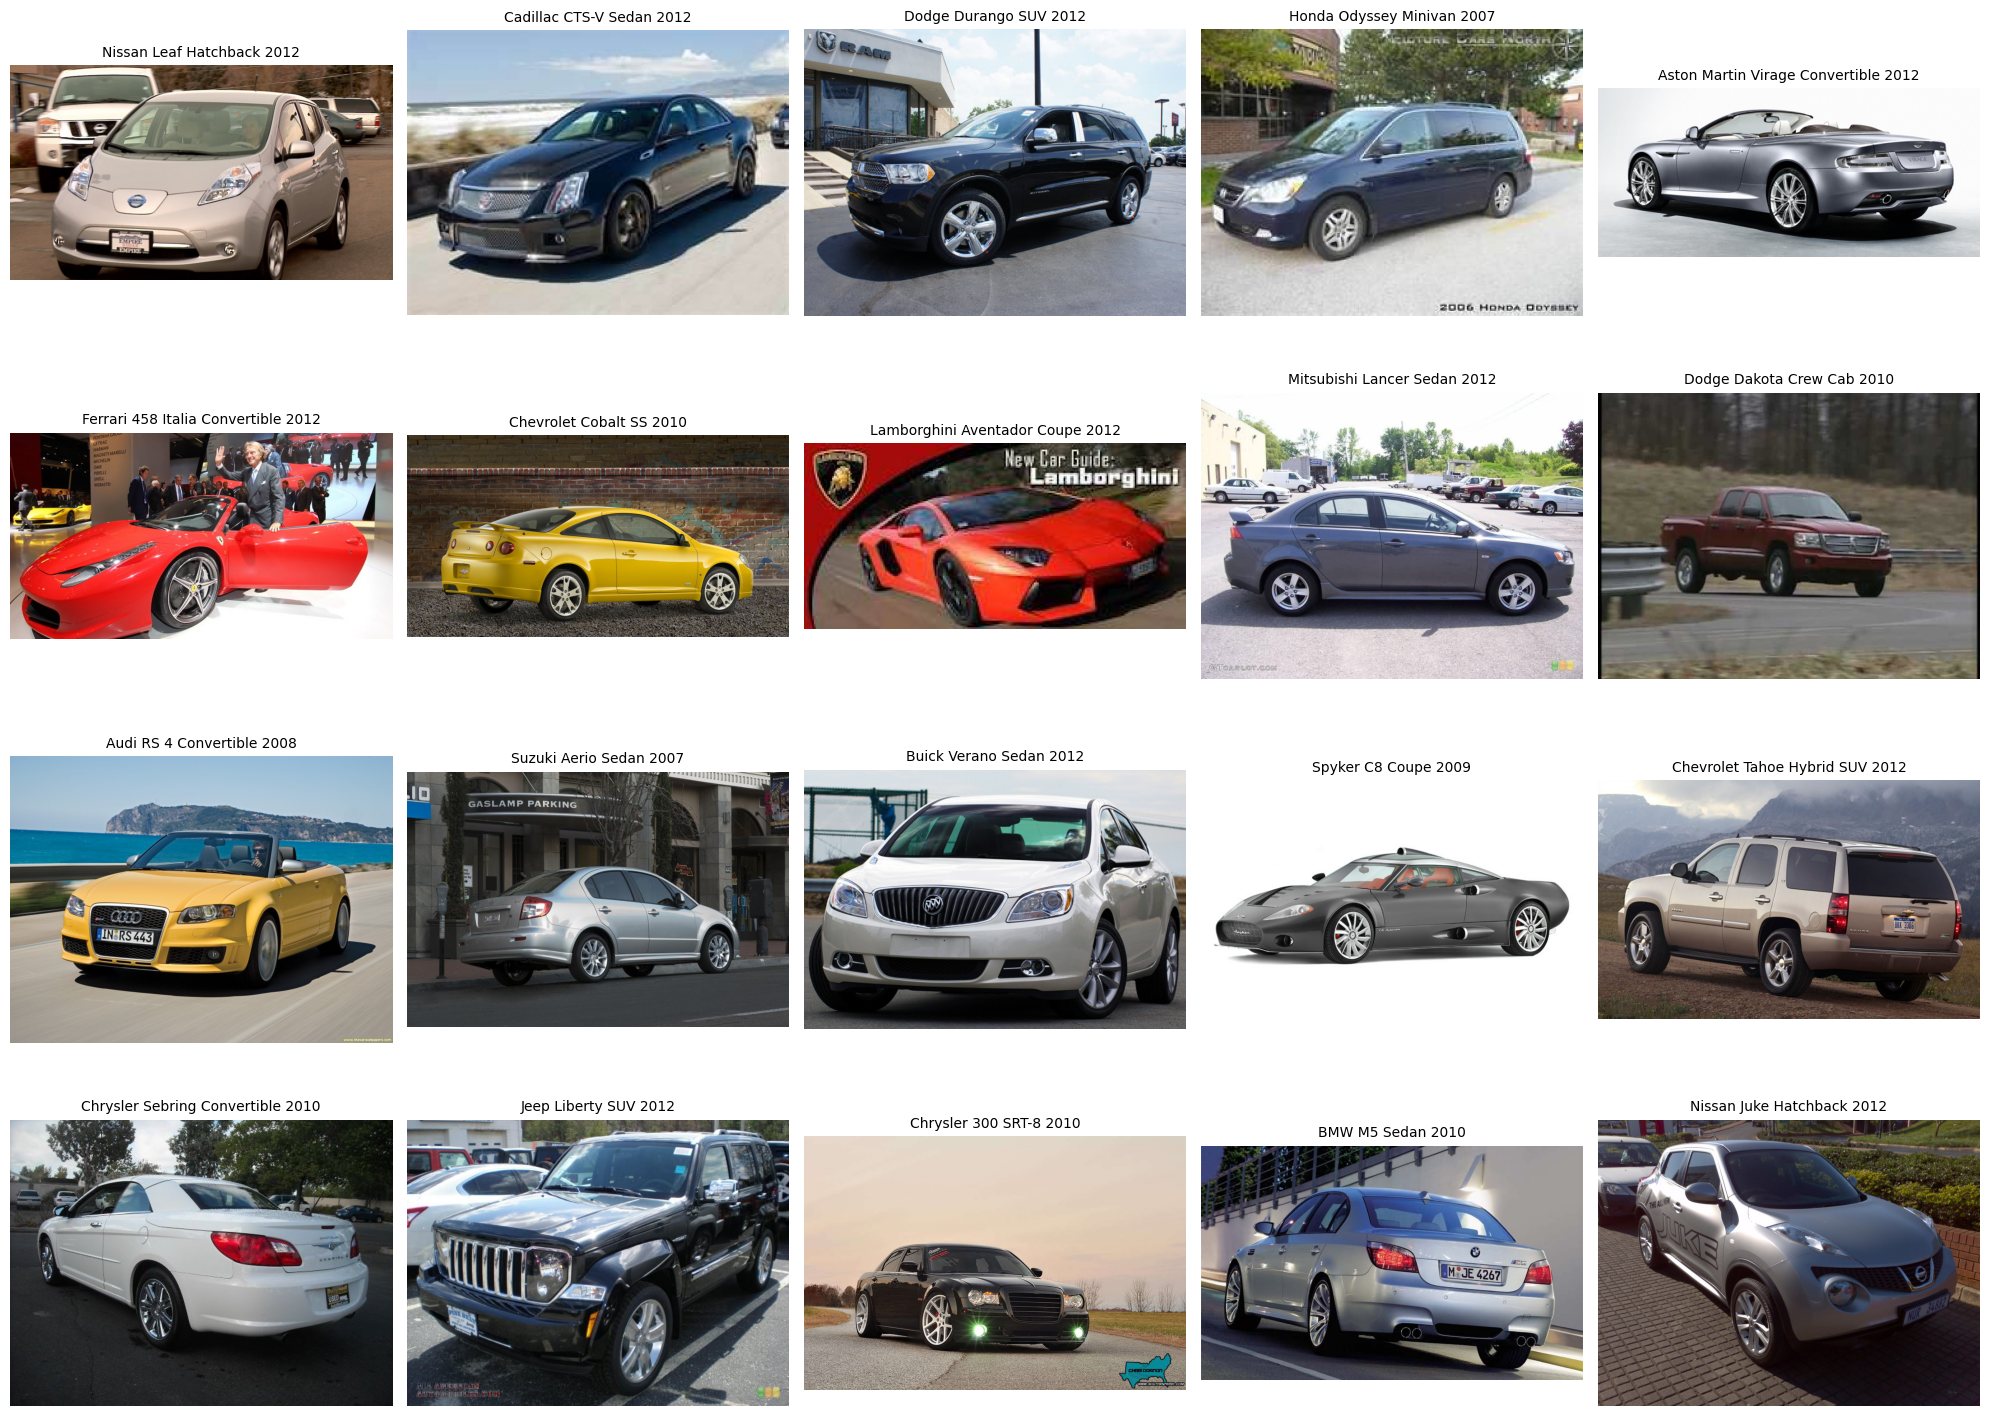

In [20]:
# Function to display images of different models
def display_unique_model_images(df, num_images=20):
    # Drop duplicates to get unique model names
    unique_models_df = df.drop_duplicates(subset='model_name').sample(num_images, random_state=42)

    fig, axes = plt.subplots(4, 5, figsize=(20, 15))  # 4 rows and 5 columns for 20 images
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        img_path = unique_models_df.iloc[i]['image_path']
        img = mpimg.imread(img_path)
        model_name = unique_models_df.iloc[i]['model_name']
        ax.imshow(img)
        ax.set_title(model_name, fontsize=10)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Display 20 unique car model images
display_unique_model_images(df_images, num_images=20)


In [21]:
# Count the number of classes (subfolders)
num_classes = len(os.listdir(data_dir))

# Count the total number of images
num_images = sum([len(files) for r, d, files in os.walk(data_dir)])

print(f"Number of classes: {num_classes}")
print(f"Number of images: {num_images}")


Number of classes: 196
Number of images: 8144


In [22]:
# Display some samples from the DataFrame
df_images.sample(10)  # Display 10 random samples

# Check for missing or empty data
print("Checking for missing data...")
print(df_images.isna().sum())


Checking for missing data...
image_path    0
model_name    0
dtype: int64
